# P03 - Life Expectancy

## Objetivos

### Generales
Evaluar y comparar el desempeño predictivo de modelos de Random Forest y XGBoost aplicados al dataset Life Expectancy Data, mediante la optimización de hiperparámetros y validación cruzada, con el fin de identificar el modelo que mejor explica la variabilidad en la esperanza de vida a partir de indicadores socioeconómicos y de salud.

### Específicos
1.	Realizar un análisis exploratorio de datos (EDA) para identificar patrones, valores faltantes y posibles transformaciones necesarias.
2.	Preparar el conjunto de datos mediante limpieza, imputación, codificación de variables categóricas y estandarización según corresponda.
3.	Entrenar un modelo Random Forest (regresión) y optimizar sus hiperparámetros mediante K-Fold Cross-Validation.
4.	Entrenar un modelo XGBoost (regresión) y optimizar sus hiperparámetros usando K-Fold Cross-Validation.
5.	Comparar el desempeño de ambos modelos usando métricas como MAE, RMSE y R², reportando media y desviación estándar después de K folds.
6.	Seleccionar el mejor modelo predictivo justificando con métricas, estabilidad y comportamiento del modelo.
7.	Interpretar los resultados y explicar qué variables influyen más en la esperanza de vida según cada modelo.

## Marco Teórico 
### Métodos Basados en Árboles y Ensambles de Modelos

---

### 1. Regresión lineal  
La regresión lineal es un método estadístico que modela la relación entre una variable respuesta \( y \) y uno o más predictores \( X \).  
Busca ajustar una recta o hiperplano que minimice el error cuadrático:

$
\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$

Es útil por su interpretabilidad, pero tiene limitaciones importantes que dan lugar a otros modelos más flexibles, como los árboles de decisión.

---

### 2. Seis problemas potenciales en una regresión (ISLP)  
En la práctica, una regresión lineal puede fallar por:

#### **1. No linealidad**
La relación entre \( X \) y \( y \) no es lineal.
Solución: transformar variables o usar modelos no lineales como árboles.

#### **2. Correlación de errores**
Los errores no son independientes (patrones temporales).  
Solución: modelos de series de tiempo o correcciones de autocorrelación.

#### **3. Varianza no constante (heterocedasticidad)**
Los errores aumentan o disminuyen con el nivel de \( X \).  
Solución: transformaciones o modelos robustos.

#### **4. Outliers**
Observaciones extremas que distorsionan la regresión.

#### **5. Puntos de palanca (high leverage)**
Observaciones que influyen mucho por tener valores extremos de \( X \).

#### **6. Colinealidad**
Variables extremadamente correlacionadas entre sí → inestabilidad en coeficientes.  
Solución: regularización (Ridge, Lasso) o modelos basados en árboles.

Estos problemas motivan el uso de métodos más flexibles como los árboles y los ensambles.

---

### 3. Árbol para regresión  
Un árbol de regresión divide los datos en regiones basadas en reglas tipo:

$
x_j < c
$

En cada región, predice la **media** de la variable respuesta.

Características:

- Modelo no lineal
- Fácil de visualizar
- Captura interacciones automáticamente
- Poca interpretación matemática, pero muy intuitivo

Criterio común para dividir: **mínimos cuadrados (RSS)**.

---

### 4. Árbol para clasificación  
Cuando la respuesta es categórica (p.e. default sí/no), el árbol predice la clase mayoritaria en cada región.

Criterios de división:

- **Impureza Gini**
- **Entropía**
- **Error de clasificación**

Ventajas:

- Interpretables
- Manejan relaciones complejas
- No requieren escalamiento

Desventaja:  
Pueden sobreajustar fácilmente → se recomienda ajustar **pruning**.

---

### 5. Bootstrap  
El bootstrap es una técnica de remuestreo donde:

- Se generan \( B \) muestras **con reemplazo** del dataset original.
- Se entrena un modelo en cada muestra.
- Se estiman promedios, errores estándar, intervalos de confianza o ensambles.

Propósito:  
**Medir la variabilidad** de un modelo sin necesidad de más datos.

---

### 6. Ensambles de modelos  
Los ensambles combinan varios modelos para lograr mejor desempeño.  
Idea principal: **muchos modelos débiles pueden formar un modelo fuerte**.

Tipos principales:

- Bagging
- Random Forest
- Boosting
- XGBoost / LightGBM / CatBoost

Beneficios:

- Reducen varianza y overfitting
- Mayor estabilidad
- Mayor precisión

---

### 7. Bagging (Bootstrap Aggregating)  
El bagging:

1. Genera muchas muestras bootstrap.
2. Entrena un modelo (generalmente un árbol) en cada una.
3. Promedia predicciones (regresión) o usa votación (clasificación).

Su mayor beneficio:  
**Reduce la varianza del modelo base**, especialmente útil para árboles no podados.

El bagging con árboles es el paso previo a **Random Forests**.

---

### 8. Boosting  
Boosting construye varios modelos secuenciales, donde cada modelo intenta corregir los errores del anterior.

Características:

- Modelos débiles → fuertes
- Alta precisión
- Controla el sesgo progresivamente
- Riesgo de sobreajuste si no se regula

Ejemplos: AdaBoost, Gradient Boosting, XGBoost.

---

### 9. Tema elegido para proyecto  

En este proyecto analizaremos el dataset global de indicadores de salud, el cual contiene información por país y año sobre variables demográficas, socioeconómicas y sanitarias, incluyendo **Life expectancy**, **Adult Mortality**, **GDP**, **HIV/AIDS**, **Income composition of resources**, entre otras.

El objetivo principal del proyecto será:

**"Predecir la esperanza de vida (Life expectancy) utilizando métodos basados en árboles de decisión y ensambles (Bagging y Boosting), evaluando su desempeño y comparándolos con modelos más simples."**

---

#### Justificación del tema

La esperanza de vida es un indicador clave del desarrollo humano y está influenciada por muchos factores que interactúan entre sí de forma **no lineal**. Por ello:

- Los **árboles de decisión** permiten capturar relaciones complejas sin suponer linealidad.
- Los ensambles como **Bagging** reducen la varianza y mejoran estabilidad.
- Métodos como **Boosting** permiten capturar patrones débiles acumulativamente para mejorar la predicción.

---



## Análisis del Dataset

### ¿De dónde viene?
El dataset proviene de compilaciones internacionales de indicadores de salud, economía y demografía, basados en fuentes como la Organización Mundial de la Salud (OMS), el Banco Mundial y estadísticas gubernamentales. Su propósito es estudiar los factores que determinan la esperanza de vida en distintos países a lo largo de varios años.

### ¿Qué contiene?
El conjunto de datos incluye variables relacionadas con:

- **Salud:** mortalidad infantil, muertes menores de cinco años, vacunación, delgadez infantil, mortalidad adulta.
- **Economía:** PIB per cápita, porcentaje de gasto en salud, composición del ingreso.
- **Demografía:** población, año.
- **Factores sociales:** estatus del país (desarrollado o en desarrollo).
- **Variable objetivo:** *Life Expectancy* (esperanza de vida en años).

En conjunto, estas variables describen el nivel sanitario, económico y social de diversos países.

### ¿Qué información dan las muestras?
Cada fila representa un país en un año específico e incluye:

- Indicadores económicos y sanitarios.
- Condiciones de desarrollo humano.
- Variables demográficas que ayudan a entender el bienestar general de la población.

Las muestras reflejan cómo cambian esas condiciones a través del tiempo y cómo se relacionan con la esperanza de vida.

### ¿Qué se quiere analizar?
El análisis busca responder:

1. ¿Qué factores explican mejor la esperanza de vida?
2. ¿Cuáles son los predictores más relevantes entre salud, economía, demografía y estatus social?
3. ¿Qué modelo es más preciso para predecir la esperanza de vida: regresión lineal, árbol de decisión o random forest?
4. ¿Qué tan buenos son los modelos al medir su error (RMSE, MAE, MAPE)?

### ¿Qué resultado se podría encontrar al ajustar un modelo?
Al ajustar distintos modelos se puede descubrir que:

- La **regresión lineal** explica alrededor del 86% de la variación en la esperanza de vida después de limpiar el dataset.
- El **árbol de decisión** identifica reglas claras basadas en variables como mortalidad adulta o escolaridad.
- El **random forest** obtiene el mejor rendimiento, con el RMSE más bajo (≈ 1.73), demostrando que las relaciones son complejas y no lineales.

Los análisis muestran que factores como la **composición del ingreso**, la **mortalidad adulta**, la **nutrición** y la **escolaridad** son determinantes importantes para explicar la esperanza de vida.



---
## Modelos propuestos (Regresión)

El objetivo del proyecto es construir modelos capaces de predecir la variable **Life expectancy** utilizando únicamente métodos de **regresión** basados en árboles y ensambles.

Se trabajará con tres componentes principales:
1. **Random Forest (regresión)**
2. **XGBoost Regressor**
3. **Pipeline con optimización de hiperparámetros y validación cruzada**

Además, todos los modelos se evaluarán con **k-fold cross-validation** y se reportarán la **media y desviación estándar** de las métricas.

---

### Random Forest Regressor

Un **Random Forest** para regresión combina muchos árboles entrenados con:
- Bootstrap con reemplazo
- Selección aleatoria de variables en cada división

Esto reduce la varianza y mejora la estabilidad del modelo frente a ruido.

**Hiperparámetros clave a optimizar:**
- `n_estimators` (número de árboles)
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `max_features`
- `bootstrap` (si usar o no bootstrap)

Se usará un `random_state` fijo para asegurar resultados consistentes.

---

### XGBoost Regressor

XGBoost es un modelo de boosting que construye árboles secuenciales en donde cada nuevo árbol corrige los errores del modelo anterior.

Ventajas:
- Muy potente para relaciones no lineales
- Incluye regularización
- Control fino de complejidad del modelo

**Hiperparámetros clave a optimizar:**
- `n_estimators`
- `learning_rate`
- `max_depth`
- `subsample`
- `colsample_bytree`
- `gamma`
- `reg_lambda`, `reg_alpha` (regularización)

También se define un `random_state` fijo para reproducibilidad.

---

### Evaluación de modelos  
Con **k-fold cross-validation**, se reportarán:

- **RMSE (Root Mean Squared Error)** -> error promedio penalizando más los errores grandes
- **MAE (Mean Absolute Error)** -> error promedio más interpretable
- **R² Score** -> proporción de variabilidad explicada

Para cada modelo se reportará:

- Media del error en k folds

- Desviación estándar entre folds

Esto permitirá evaluar:
- Precisión
- Estabilidad
- Capacidad de generalización

---

### Comparación final entre modelos

Después de entrenar Random Forest y XGBoost:

Se compararán con base en:
- Mejor RMSE promedio
- Menor MAE
- Menor variabilidad entre folds
- Importancia de características
- Tiempo de entrenamiento vs desempeño

Al final se seleccionará el **mejor modelo predictivo de Life Expectancy** basado en resultados empíricos.

---
### Código :

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [41]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [42]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [44]:
data = data.dropna()
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [45]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [46]:
data = data.drop(columns=['Country','Year'])
data.columns

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [47]:
X = data.drop(columns=["Life expectancy "])
y = data["Life expectancy "]
categorical_features = ["Status"]
numeric_features = X.columns.drop(categorical_features)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# El train test es solo para usar el test para probar los datos sin usar los datos que usamos en el kfold con el que se entreno el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42
)

## Random Forest Regressor

In [48]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf)
])

param_grid_rf = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring=scoring,
    cv=kf,
    n_jobs=-1,
    refit="MAE",
    return_train_score=True
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Status']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'P...
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [200, 400]},
             refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [49]:
idx = grid_rf.best_index_

# MAE
mean_mae = -grid_rf.cv_results_["mean_test_MAE"][idx]
std_mae  = grid_rf.cv_results_["std_test_MAE"][idx]

# RMSE
mean_rmse = -grid_rf.cv_results_["mean_test_RMSE"][idx]
std_rmse  = grid_rf.cv_results_["std_test_RMSE"][idx]

# R2
mean_r2 = grid_rf.cv_results_["mean_test_R2"][idx]
std_r2  = grid_rf.cv_results_["std_test_R2"][idx]

print("Random Forest (CV 5 folds)")
print("Mejores hiperparámetros:", grid_rf.best_params_)
print(f"MAE (mean ± std): {mean_mae:.4f} ± {std_mae:.4f}")
print(f"RMSE (mean ± std): {mean_rmse:.4f} ± {std_rmse:.4f}")
print(f"R2 (mean ± std): {mean_r2:.4f} ± {std_r2:.4f}")

Random Forest (CV 5 folds)
Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
MAE (mean ± std): 1.2729 ± 0.0777
RMSE (mean ± std): 1.9304 ± 0.1533
R2 (mean ± std): 0.9508 ± 0.0043


In [50]:
best_rf = grid_rf.best_estimator_
y_pred_test = best_rf.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Random Forest (Test)")
print(f"MAE test: {mae_test:.4f}")
print(f"RMSE test: {rmse_test:.4f}")
print(f"R2 test: {r2_test:.4f}")

Random Forest (Test)
MAE test: 1.2535
RMSE test: 2.0023
R2 test: 0.9493


In [52]:
# Importancia de las variables
best_rf = grid_rf.best_estimator_
rf_model = best_rf.named_steps["model"]
preprocessor = best_rf.named_steps["preprocess"]
ohe = preprocessor.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(["Status"]).tolist()
numeric_feature_names = numeric_features.tolist()
final_feature_names = cat_feature_names + numeric_feature_names

importances = rf_model.feature_importances_
feat_importance_df = pd.DataFrame({
    "feature": final_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)
feat_importance_df

,feature,importance
17,Income composition of resources,0.556476
12,HIV/AIDS,0.222716
1,Adult Mortality,0.130619
15,thinness 1-19 years,0.013589
18,Schooling,0.012119
16,thinness 5-9 years,0.010466
10,Total expenditure,0.008774
3,Alcohol,0.008134
7,BMI,0.005957
4,percentage expenditure,0.005308


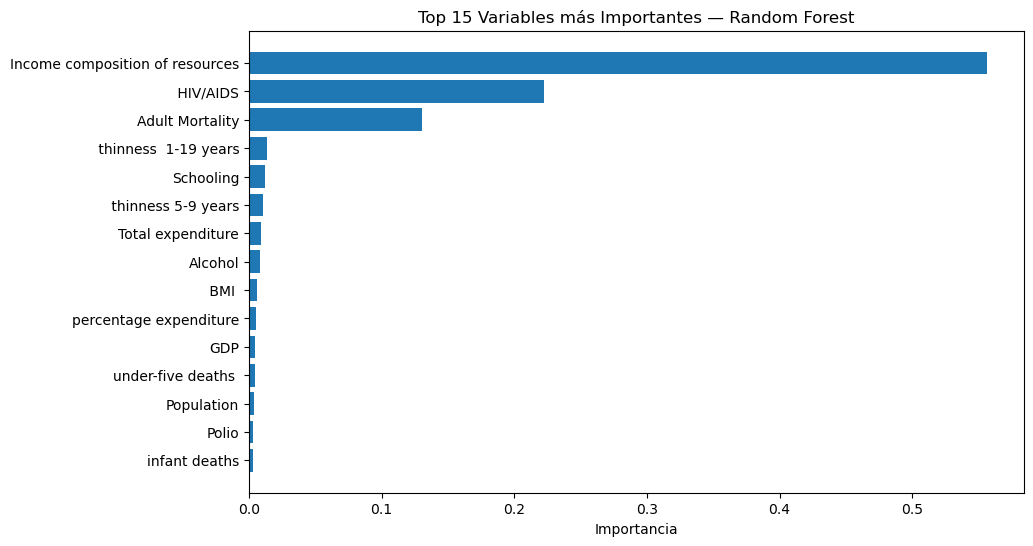

In [54]:
top_n = 15
top_feats = feat_importance_df.head(top_n)

plt.figure(figsize=(10,6))
plt.barh(top_feats["feature"], top_feats["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más Importantes — Random Forest")
plt.xlabel("Importancia")
plt.show()

### Interpretación

El modelo Random Forest mostró un desempeño sobresaliente en la predicción de la esperanza de vida, con métricas muy consistentes tanto en validación cruzada como en el conjunto de prueba. Los resultados de CV (MAE ≈ 1.27, RMSE ≈ 1.93, R² ≈ 0.95) y del test (MAE ≈ 1.25, R² ≈ 0.95) indican que el modelo generaliza correctamente y explica alrededor del 95% de la variabilidad del fenómeno, lo que refleja alta estabilidad y ausencia de sobreajuste. En términos prácticos, el error promedio del modelo representa poco más de un año, lo cual es sorprendentemente preciso considerando la complejidad multidimensional de los factores que determinan la esperanza de vida a nivel global.

Respecto a la importancia de las variables, el modelo identificó que la Income Composition of Resources es el principal determinante de la esperanza de vida, evidenciando el rol fundamental de las condiciones económicas y el acceso a recursos. Le siguen en relevancia la prevalencia de HIV/AIDS y la mortalidad adulta, factores directamente vinculados con la salud pública y los sistemas sanitarios. Otros predictores como la desnutrición infantil (thinness), la escolaridad y el gasto total en salud también aportan información significativa. En conjunto, el Random Forest revela que la esperanza de vida es un fenómeno altamente influenciado por el bienestar económico, la carga de enfermedades y las condiciones de desarrollo social y sanitario de cada país.

## XGBoost

In [56]:
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb)
])

param_grid_xgb = {
    "model__n_estimators": [300, 500],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

scoring = {
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    scoring=scoring,
    refit="MAE",
    cv=kf,
    n_jobs=-1,
    return_train_score=True
)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Status']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'P...
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [300, 500],
                         'model__subsample': [0.8, 1.0]},
             refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [57]:
idx = grid_xgb.best_index_

mean_mae = -grid_xgb.cv_results_["mean_test_MAE"][idx]
std_mae  =  grid_xgb.cv_results_["std_test_MAE"][idx]

mean_rmse = -grid_xgb.cv_results_["mean_test_RMSE"][idx]
std_rmse  =  grid_xgb.cv_results_["std_test_RMSE"][idx]

mean_r2 = grid_xgb.cv_results_["mean_test_R2"][idx]
std_r2  = grid_xgb.cv_results_["std_test_R2"][idx]

print("XGBoost (CV 5 folds)")
print("Mejores hiperparámetros:", grid_xgb.best_params_)
print(f"MAE (mean ± std): {mean_mae:.4f} ± {std_mae:.4f}")
print(f"RMSE (mean ± std): {mean_rmse:.4f} ± {std_rmse:.4f}")
print(f"R2 (mean ± std): {mean_r2:.4f} ± {std_r2:.4f}")

XGBoost (CV 5 folds)
Mejores hiperparámetros: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 500, 'model__subsample': 0.8}
MAE (mean ± std): 1.1927 ± 0.0867
RMSE (mean ± std): 1.8486 ± 0.1677
R2 (mean ± std): 0.9549 ± 0.0047


In [59]:
best_xgb = grid_xgb.best_estimator_
y_pred_test = best_xgb.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("XGBoost (Test)")
print(f"MAE test: {mae_test:.4f}")
print(f"RMSE test: {rmse_test:.4f}")
print(f"R² test: {r2_test:.4f}")

XGBoost (Test)
MAE test: 1.2119
RMSE test: 2.0462
R² test: 0.9470


In [60]:
# Importancia de variables
xgb_model = best_xgb.named_steps["model"]
importances = xgb_model.feature_importances_
ohe = best_xgb.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features).tolist()
num_feature_names = numeric_features.tolist()
final_feature_names = cat_feature_names + num_feature_names

feat_importance_xgb = pd.DataFrame({
    "feature": final_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_importance_xgb

,feature,importance
17,Income composition of resources,0.463549
12,HIV/AIDS,0.421838
1,Adult Mortality,0.029438
15,thinness 1-19 years,0.018092
16,thinness 5-9 years,0.013669
8,under-five deaths,0.010465
18,Schooling,0.010377
3,Alcohol,0.004722
2,infant deaths,0.004173
10,Total expenditure,0.003885


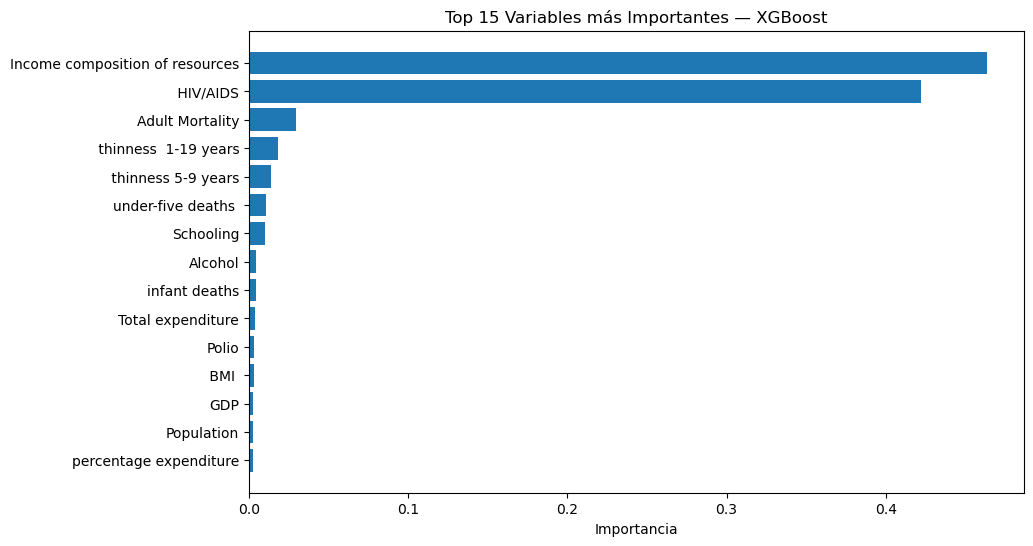

In [61]:
top = feat_importance_xgb.head(15)

plt.figure(figsize=(10,6))
plt.barh(top["feature"], top["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más Importantes — XGBoost")
plt.xlabel("Importancia")
plt.show()

### Interpretación

El modelo XGBoost mostró un desempeño sobresaliente durante la validación cruzada, con un MAE promedio de aproximadamente 1.19 años y un R² cercano a 0.955, lo que indica una capacidad predictiva ligeramente superior a la del Random Forest. La estabilidad de sus métricas, reflejada en desviaciones estándar bajas, demuestra que el modelo captura patrones consistentes en los datos y generaliza adecuadamente. En el conjunto de prueba, los resultados se mantuvieron prácticamente iguales (MAE ≈ 1.21, R² ≈ 0.947), confirmando que el modelo no sobreajusta y conserva un alto poder explicativo al enfrentarse a datos nuevos.

En cuanto a los factores determinantes de la esperanza de vida, XGBoost identificó que la composición de ingresos y la prevalencia de HIV/AIDS son, por amplio margen, las variables más influyentes. Esto sugiere que tanto las condiciones económicas como la carga epidemiológica siguen siendo los principales motores de la variación en la esperanza de vida entre países. Otros factores como la mortalidad adulta, los indicadores de nutrición infantil y los años de escolaridad también contribuyen, aunque en menor magnitud. En conjunto, XGBoost ofrece una visión clara de cómo la salud pública, el desarrollo económico y las condiciones sociales interactúan para determinar la longevidad poblacional.


## Conclusión

Los modelos Random Forest y XGBoost mostraron un desempeño sobresaliente al predecir la esperanza de vida, alcanzando niveles de precisión muy altos, con errores promedio cercanos a un año y coeficientes de determinación alrededor del 95%. La validación cruzada demostró que XGBoost presenta un rendimiento ligeramente superior en términos de MAE, RMSE y R², lo que refleja su capacidad para capturar relaciones no lineales y patrones complejos en los datos. Por otro lado, el desempeño en el conjunto de prueba mostró resultados prácticamente equivalentes, con el Random Forest presentando un ligero pero no significativo mejor ajuste en R² y RMSE, evidenciando que ambos modelos generalizan correctamente.

En cuanto a los factores que explican la esperanza de vida, ambos algoritmos coincidieron en que la composición de ingresos y la prevalencia de HIV/AIDS son los determinantes más importantes, seguidos por la mortalidad adulta, la nutrición infantil y el nivel educativo. Esta consistencia entre modelos refuerza la validez de los resultados y sugiere que la esperanza de vida es un fenómeno explicado principalmente por condiciones socioeconómicas, la carga epidemiológica y factores estructurales de salud pública. En conjunto, los modelos desarrollados ofrecen una herramienta robusta para comprender cómo distintos indicadores demográficos y sanitarios influyen en la longevidad poblacional.

